<a href="https://colab.research.google.com/github/rawatpranjal/Structural-Economics/blob/main/IO_PS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preliminaries

In [2]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels 
from statsmodels.sandbox.regression.gmm import GMM, IV2SLS, IVGMM
from pandas.testing import assert_index_equal

In [4]:
df = pd.read_csv("rcl_data_4.csv")
df.set_index(keys=['mktid','firmid', 'prodid'], inplace=True)
shares = df['share']

## Summary statistics

In [5]:
df_widxs = df.copy()
df_widxs['firmid'] = df_widxs.index.get_level_values('firmid')
df_widxs['prodid'] = df_widxs.index.get_level_values('prodid')
stats_mktlvl = df_widxs.groupby(by=['mktid']).aggregate({'firmid': 'count', 'prodid': 'count'})
stats_mktlvl.rename(columns={"firmid": "#Firms", "prodid": "#Products"}, inplace=True)
nfirms = stats_mktlvl["#Firms"]
nprods = stats_mktlvl["#Products"]
df_std = df.groupby('mktid').mean()
df_mean = df.groupby('mktid').median()
stats_mktlvl.join(df_mean.join(df_std,rsuffix='_std',lsuffix='_mean'))

#Firms  #Products  price_mean  share_mean  xvar_mean  wvar_mean  \
mktid                                                                    
1           7          7    2.606675    0.149334   1.952670  -0.370695   
2           7          7    2.430668    0.070118   2.685479  -0.564728   
3           7          7    2.844954    0.082008   2.660057  -0.126529   
4          11         11    3.326305    0.009768   1.946938   0.218622   
5          11         11    2.663987    0.027104   1.946938  -0.089058   
6           8          8    2.698184    0.039247   1.949804   0.131254   
7           6          6    2.966885    0.122192   2.030004   0.142384   
8          12         12    3.088131    0.014099   2.077402   0.061042   
9          10         10    3.246889    0.021610   1.957790   0.171797   
10         10         10    3.289496    0.004131   2.249770  -0.123245   
11         10         10    3.049307    0.026473   2.075104   0.190220   
12          9          9    3.382363    0.006263   2.202134  -0.093903   
13          6          6    3.541219    0.083761   1.905272   0.322942   
14         11         11    2.718769    0.011318   2.202134   0.181608   
15         11         11    3.183973    0.011356   1.952670   0.111708   
16         11         11    2.749118    0.007573   1.952670   0.193548   
17          9          9    2.717297    0.045649   1.968643  -0.140500   
18          8          8    3.180640    0.059409   1.903772   0.150187   
19         12         12    2.973293    0.004870   2.248998   0.002854   
20         12         12    3.995450    0.003017   2.248998   0.002854   

       price_std  share_std  xvar_std  wvar_std  
mktid                                            
1       2.750983   0.118469  1.945542 -0.293838  
2       2.608820   0.136178  2.631723 -0.270162  
3       3.098984   0.128079  2.576645  0.065384  
4       3.530610   0.072886  1.983285  0.168326  
5       2.854352   0.082693  1.801961 -0.154398  
6       2.950200   0.106947  1.940615  0.029890  
7       2.868110   0.121251  1.825464 -0.006352  
8       3.062927   0.073310  2.144377  0.101264  
9       3.361858   0.076573  2.155827  0.141241  
10      3.136753   0.092536  2.318149 -0.148347  
11      3.145455   0.085516  2.222370  0.251135  
12      3.082844   0.097801  2.174316 -0.152491  
13      3.445309   0.085021  1.722379  0.334948  
14      2.808752   0.085931  2.216398  0.113575  
15      3.342637   0.081644  2.005500  0.093831  
16      2.819015   0.084264  2.003645 -0.007891  
17      2.795841   0.099764  1.943064 -0.127777  
18      3.214309   0.090613  1.909153 -0.002098  
19      3.049069   0.077683  2.179259  0.006176  
20      4.230510   0.054307  2.179259  0.006176

### Market Summaries

In [6]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc={'figure.figsize':(15,6)})

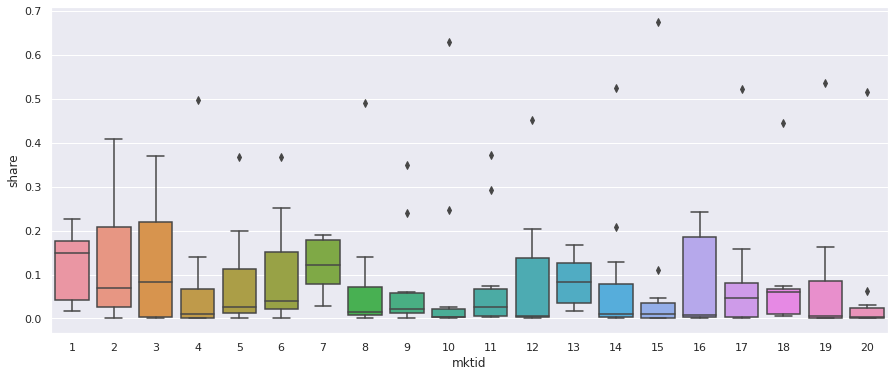

In [7]:
# Shares by Market
sns.boxplot(x="mktid", y="share",data=df.reset_index())

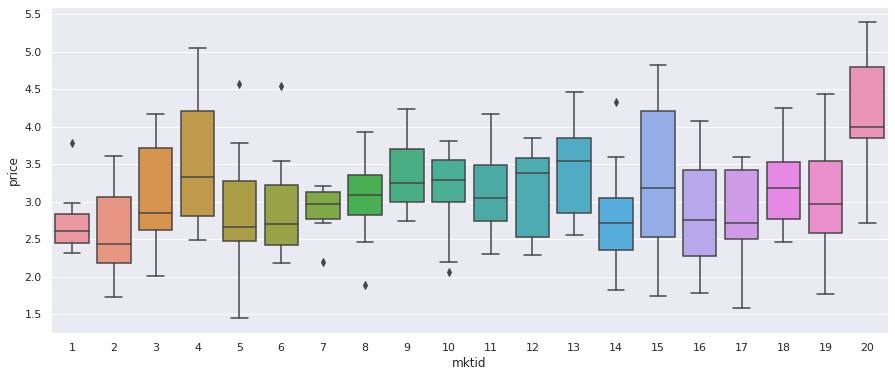

In [8]:
# Prices by Market
sns.boxplot(x="mktid", y="price",data=df.reset_index())

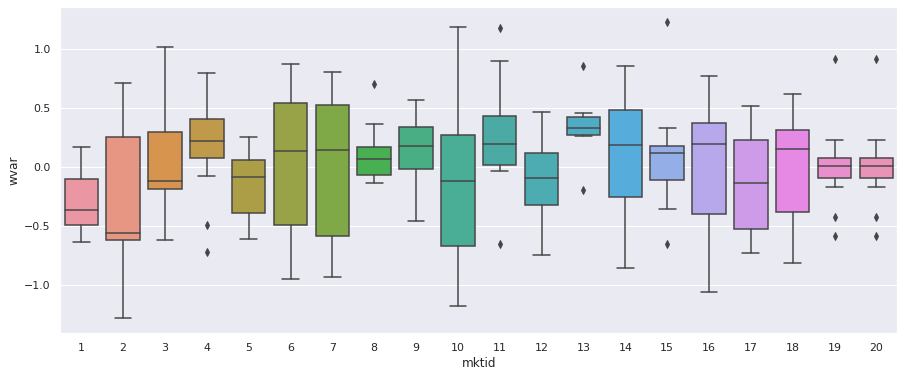

In [9]:
# Costs by Market
sns.boxplot(x="mktid", y="wvar",data=df.reset_index())

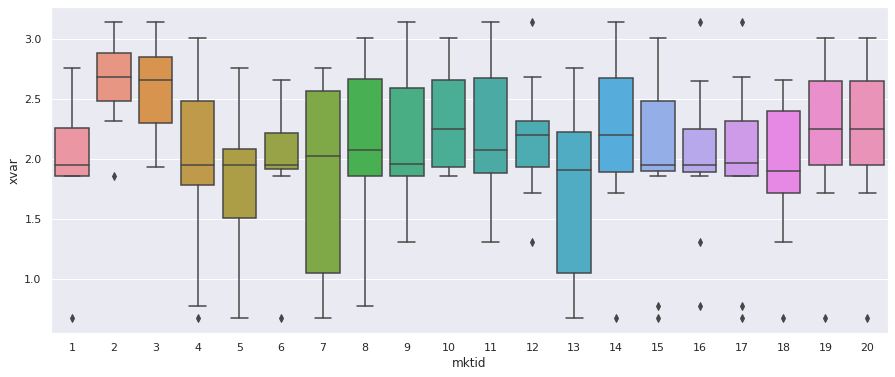

In [10]:
# Characteristics by Market
sns.boxplot(x="mktid", y="xvar",data=df.reset_index())

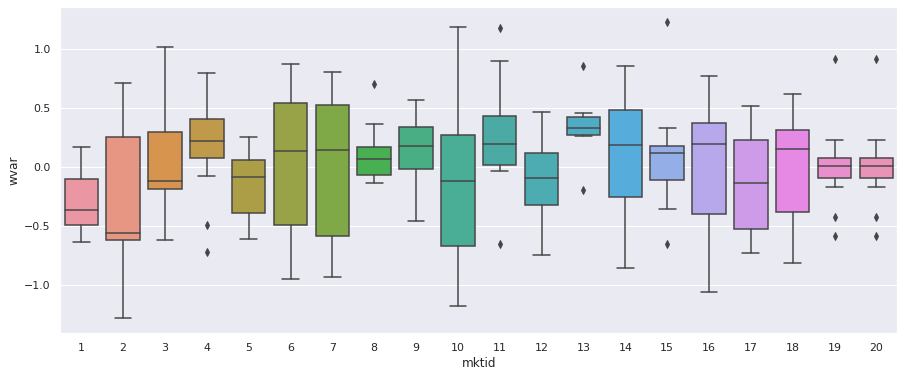

In [11]:
# Characteristics by Market
sns.boxplot(x="mktid", y="wvar",data=df.reset_index())

### Firm Summaries

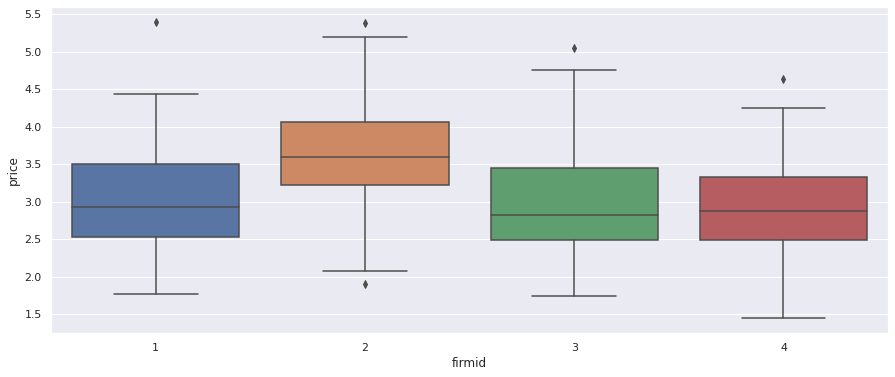

In [12]:
# Prices by Firm
sns.boxplot(x="firmid", y="price",data=df.reset_index())

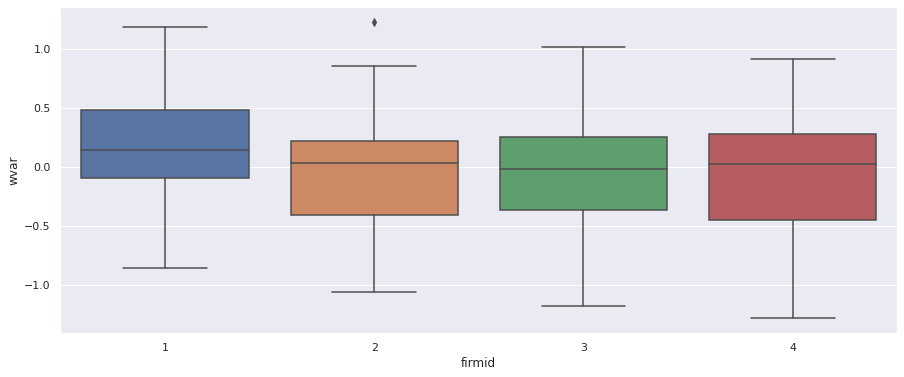

In [13]:
# Costs by Firm
sns.boxplot(x="firmid", y="wvar",data=df.reset_index())

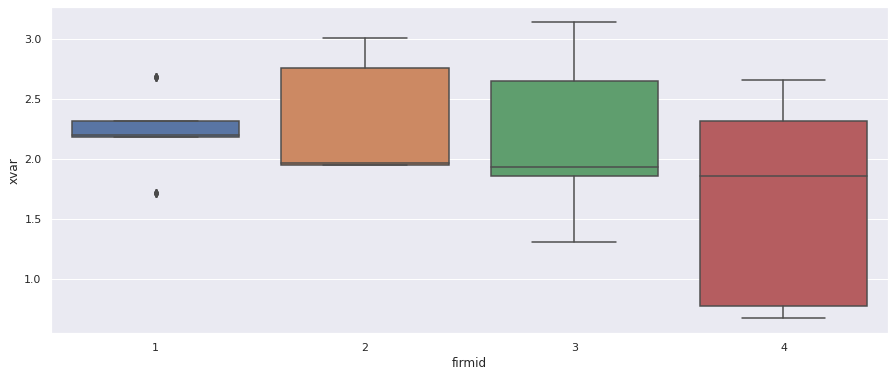

In [14]:
# Characteristics by Firm
sns.boxplot(x="firmid", y="xvar",data=df.reset_index())

### Product Summaries

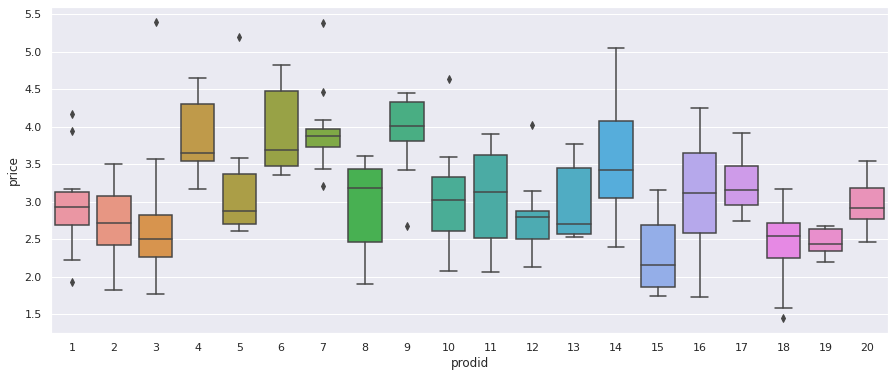

In [15]:
# Prices by Prod
sns.boxplot(x="prodid", y="price",data=df.reset_index())

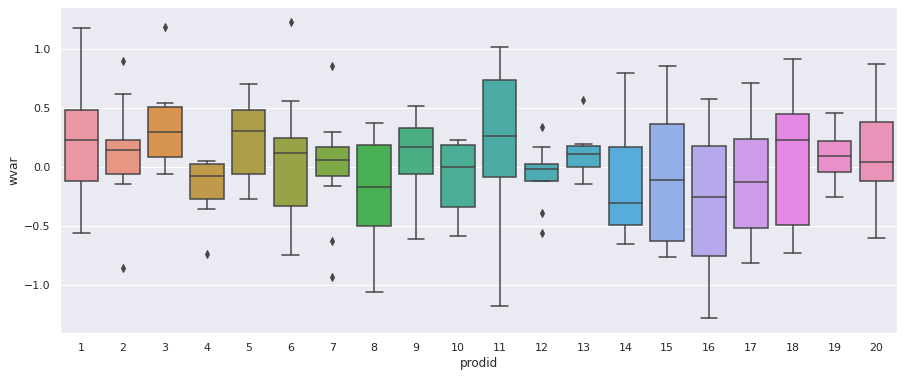

In [16]:
# Costs by Prod
sns.boxplot(x="prodid", y="wvar",data=df.reset_index())

## Logit model warmup

### OLS

In [17]:
df["log_share"] = np.log(df["share"])
logit_ols = sm.ols(formula="log_share ~ xvar + price", data=df).fit()
print(logit_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              log_share   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     340.1
Date:                Sat, 28 Jan 2023   Prob (F-statistic):           1.07e-62
Time:                        05:38:40   Log-Likelihood:                -274.26
No. Observations:                 188   AIC:                             554.5
Df Residuals:                     185   BIC:                             564.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4678      0.360      4.073      0.0

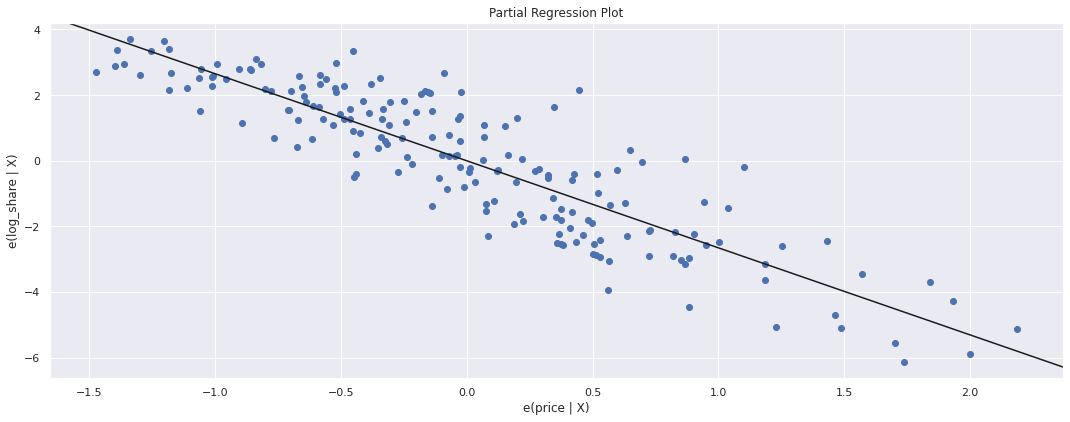

In [18]:
# Partial Regression Plot of logshare-E[logshare|xvar] on price-E[price|xvar]
import statsmodels.api as sm_
fig = sm_.graphics.plot_partregress("log_share", "price", ["xvar"], data=df, obs_labels = False)
fig.tight_layout(pad=1.0)

### 2SLS

In [20]:
import statsmodels.api as sm_
Y = df["log_share"]
X = sm_.add_constant(df[["xvar", "price"]])
Z = sm_.add_constant(df[["xvar", "wvar"]])
logit_2sls = IV2SLS(endog=Y,exog=X, instrument=Z).fit()
constant, alpha, beta = logit_2sls.params
print(logit_2sls.summary())

                          IV2SLS Regression Results                           
Dep. Variable:              log_share   R-squared:                       0.785
Model:                         IV2SLS   Adj. R-squared:                  0.783
Method:                     Two Stage   F-statistic:                     86.48
                        Least Squares   Prob (F-statistic):           3.04e-27
Date:                Sat, 28 Jan 2023                                         
Time:                        05:38:51                                         
No. Observations:                 188                                         
Df Residuals:                     185                                         
Df Model:                           2                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6599      0.583      2.846      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### GMM

3. With GMM: When we have strong instruments, GMM is more efficient than 2SLS under heteroskedasticity because computes the 'optimal weighing matrix' to weigh sample moments. 

In [23]:
import statsmodels.api as sm_
Y = df["log_share"]
X = sm_.add_constant(df[["xvar", "price"]])
Z = sm_.add_constant(df[["xvar", "wvar"]])
logit_gmm = IVGMM(endog=Y,exog=X,instrument=Z).fit();
constant, alpha, beta = logit_gmm.params;
print(logit_gmm.summary());

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
                                IVGMM Results                                 
Dep. Variable:              log_share   Hansen J:                    1.403e-11
Model:                          IVGMM   Prob (Hansen J):                   nan
Method:                           GMM                                         
Date: 

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Double Machine Learning 


$log(s)=αp+g(x)+e, E[e|x,w]=0$
 - Here $g$ is estimated by flexible machine learning methods
 - and $[x,w]$ are instruments

In [25]:
%pip install doubleml
from doubleml import DoubleMLData, DoubleMLPLIV
from sklearn.ensemble import RandomForestRegressor
l = RandomForestRegressor() # Model for E[Y|X] = E[θD+g(X)]
g = RandomForestRegressor() # Model for E[Y - θD|X]=g(X)
m = RandomForestRegressor() # Model for E[D|X]
data = DoubleMLData(df, y_col="log_share",d_cols=["price"], x_cols=["xvar"],z_cols=[ "wvar"])
DML = DoubleMLPLIV(data, l, m, g, n_folds=5, apply_cross_fitting=True)
DML.fit();
print(DML.summary)
import numpy as np
beta = np.array(DML.summary).reshape(-1).tolist()[0]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 KB 3.9 MB/s eta 0:00:00
          coef   std err          t         P>|t|     2.5 %    97.5 %
price -2.81427  0.172634 -16.301921  9.563766e-60 -3.152627 -2.475913


### Why do we need Instruments? 

Let demand curve be: $q=βp+d$ where $d$ is a random demand shifter (e.g. random holiday). Since demand shifters are likely to effect price (as price and quantity determined simultaneously), $E[dp] \not= 0$. 

- $q=βp+d, E[dp] \not= 0 \implies β \not= E[x^2]^{-1}E[yx]$
- So $\hat{β}=(\sum_{i}x_{i}^2)^{-1}(\sum_{i}y_{i}x_{i})$ will not converge to $β$

But if we have access to a supply/cost shifter $c$ (e.g. weather) that is exogenous to demand,

- $c \perp d$ 
- $q=p+c$. 

We can solve for price to get: 

- $p= \theta_{1}c + \theta_{2}d$

Thus  $c$  will influence both price and quantity but be uncorrelated with demand shocks. 
- $E[dc] = 0, E[pc] \not=0 \implies β = E[xc]^{-1}E[yc]$

Thus these are the two conditions for $c$ to be a valid instrument: 
- (untestable) $E[dc] = 0$ 
- (testable) $E[pc] \not= 0$. 

Examples of other Instruments: 
- Cost shifters: marginal costs, wages, fixed costs, input prices, prices in other markets (Hausman)
- Markup shifters: product characteristics, entry/exit events, merger/collusion event, 

### Elasticities 

In [26]:
def get_logit_elasticities(mktid: int) -> pd.DataFrame:
    df_mkt = df[df.index.get_level_values('mktid')==mktid].droplevel('mktid')
    mkt_elst = -alpha*np.dot(np.ones((nfirms.loc[mktid],1)), (df_mkt["price"]*df_mkt["share"]).to_numpy().reshape((1,nfirms.loc[mktid]))) + alpha*np.diag(df_mkt["price"])
    return pd.DataFrame(mkt_elst, index=df_mkt.index, columns=df_mkt.index)

Matrix of own and cross-price elasticities for market 1:

In [27]:
get_logit_elasticities(1)

firmid                1         2                   3         4            \
prodid               5         7         8         14        16        17   
firmid prodid                                                               
1      5       2.747569 -0.082290 -0.597102 -0.488058 -0.656011 -0.143866   
2      7      -0.807944  5.078138 -0.597102 -0.488058 -0.656011 -0.143866   
       8      -0.807944 -0.082290  2.810417 -0.488058 -0.656011 -0.143866   
3      14     -0.807944 -0.082290 -0.597102  2.780164 -0.656011 -0.143866   
4      16     -0.807944 -0.082290 -0.597102 -0.488058  3.003656 -0.143866   
       17     -0.807944 -0.082290 -0.597102 -0.488058 -0.656011  3.920104   
       18     -0.807944 -0.082290 -0.597102 -0.488058 -0.656011 -0.143866   

firmid                   
prodid               18  
firmid prodid            
1      5      -0.147731  
2      7      -0.147731  
       8      -0.147731  
3      14     -0.147731  
4      16     -0.147731  
       17     -0.147731  
       18      3.003402

### Hausman Instruments

Hausman instrument uses prices from other cities when cost data is unavailable. Let $i$ index cities,

$p_{i}= \theta_{1}c_{i} + \theta_{2}d_{i}$

Then $p_{-i}$ can be a valid instrument for $p_{i}$ when,

(1) $c_{i}$ is a valid instrument for $p_{i}$

(2) $E[c_{-i}c_{i}] \not=0$: Costs accross cities have a common factor.

(2) $E[d_{-i}d_{i}] =0$: Demand innovations accross cities have no common factor and are uncorrelated. 

**Hauseman (1994)**

"However, at the lower levels where consumers choose among brands, the search for instruments is more difficult since excluded **cost shifting variables at the
brand level may be difficult to find**, depending on the given situation...Our approach is to allow for both individual brand fixed effects and city fixed effects, and then to use the prices from one city as instruments for other cities ...The intuition that we use is that prices in each city reflect underlying product costs and city
specific factors which vary over time as supermarkets run promotions on a particular product. To the extent that the stochastic city specific factors are independent of each other, prices from one city can serve as instruments
for another city."

$i$: brand, $n$: city, $t$: period, $s_{int}$:revenue share of total segment expenditure, $y_{Gnt}$:segment expenditure, $P_{nt}$:price index, $p_{jnt}$: price, $c_{jt}$:cost, $α_{jn}$:city-specific transport and wage differential, $w_{jnt}$: offers/discounts. 

(1) Demand: $s_{int}=α_{in}+β_{i}log(y_{Gnt}/P_{nt}+\sum_{j} γ_{ij}log(p_{jnt})+e_{int}$

(4) Pricing: $log(p_{jnt})=δ_{j}log(c_{jt})+α_{jn}+w_{jnt}$

"The specific identifying assumption that we make is
that the $w_{jnt}$ are independent across cities...The idea is that prices in one city (after elimination of city
and brand specific effects) are driven by underlying costs, $c_{it}$, which provide instrumental variables which are correlated with prices but are
uncorrelated with stochastic disturbances in the demand equations, e.g.,
$w_{jnt}$ from equation (4) is uncorrelated with $e_{ilt}$ from equation (1) when the cities are different, $n \not= l$."

In [30]:
def make_hausman_instr(mktid: int) -> pd.DataFrame:
    df_mkt = df[df.index.get_level_values('mktid')==mktid].droplevel('mktid')
    df_othermkts = df[~df.index.get_level_values('mktid').isin([mktid])]
    df_mkt["hausman_priceavg"] = df_othermkts.groupby(by=["firmid", "prodid"])["price"].mean()
    return df_mkt

df_mkt1 = make_hausman_instr(1)
logit_haus_2sls = IV2SLS(endog=df_mkt1["log_share"], exog=df_mkt1[["xvar", "price"]], instrument=df_mkt1[["xvar", "hausman_priceavg"]]).fit()
alpha_haus, beta_haus = logit_haus_2sls.params
print(logit_haus_2sls.summary())

                          IV2SLS Regression Results                           
Dep. Variable:              log_share   R-squared:                       0.976
Model:                         IV2SLS   Adj. R-squared:                  0.967
Method:                     Two Stage   F-statistic:                       nan
                        Least Squares   Prob (F-statistic):                nan
Date:                Sat, 28 Jan 2023                                         
Time:                        05:40:06                                         
No. Observations:                   7                                         
Df Residuals:                       5                                         
Df Model:                           2                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
xvar           1.1033      0.494      2.232      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


## Random Coefficients Logit Model

In [ ]:
from scipy.stats import gumbel_r 

def simulate_consumers(n:int=500, scale:float=1) -> pd.Series:
    return pd.Series(data=gumbel_r.rvs(scale=scale, size=n), name='eps')

In [ ]:
cons = simulate_consumers()